In [26]:
import pandas as pd

In [27]:
df_feature_x = pd.read_csv("preprocess.csv", index_col=0)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,6
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4,2,18


In [28]:
df_feature_y = pd.read_csv("label.csv", index_col=0)
df_feature_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0
10,1.0


In [30]:
from sklearn.preprocessing import StandardScaler
import numpy as np

norm_scaler = StandardScaler()

years_exp = df_feature_x["YearsExp"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsProExp"].values.reshape(-1, 1)
num_skills = df_feature_x["NumSkills"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_exp, years_pro_exp, num_skills))

new_values = norm_scaler.fit_transform(data_to_normal)

df_feature_x["YearsExp"] = new_values[:, 0]
df_feature_x["YearsProExp"] = new_values[:, 1]
df_feature_x["NumSkills"] = new_values[:, 2]

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.758018,-0.628905,-1.471693
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.109125,-0.464633,-0.161156
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.280211,-0.300361,-0.980242
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.498461,-0.300361,0.002662
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.498461,-0.957449,-1.307876
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.707776,1.670905,0.657930
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.150432,-0.464633,-1.471693
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.394898,2.163722,-1.635511
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.929104,1.342361,-1.144059
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.147354,-0.957449,0.821748


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

years_exp = df_feature_x["YearsExp"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsProExp"].values.reshape(-1, 1)
num_skills = df_feature_x["NumSkills"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_exp, years_pro_exp, num_skills))

new_values = norm_scaler.fit_transform(data_to_normal)

df_feature_x["YearsExp"] = new_values[:, 0]
df_feature_x["YearsProExp"] = new_values[:, 1]
df_feature_x["NumSkills"] = new_values[:, 2]

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.758018,-0.628905,-1.471693
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.109125,-0.464633,-0.161156
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.280211,-0.300361,-0.980242
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.498461,-0.300361,0.002662
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.498461,-0.957449,-1.307876
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.707776,1.670905,0.657930
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.150432,-0.464633,-1.471693
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.394898,2.163722,-1.635511
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.929104,1.342361,-1.144059
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.147354,-0.957449,0.821748


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.2, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 66965
Train data: 53572
Validation data: 13393


In [50]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [51]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

Epoch 1/20
1675/1675 [==============================] - 12s 7ms/step - loss: 0.4731 - accuracy: 0.7691 - val_loss: 0.4558 - val_accuracy: 0.7812
Epoch 2/20
1675/1675 [==============================] - 11s 7ms/step - loss: 0.4579 - accuracy: 0.7764 - val_loss: 0.4547 - val_accuracy: 0.7792
Epoch 3/20
1675/1675 [==============================] - 11s 6ms/step - loss: 0.4565 - accuracy: 0.7764 - val_loss: 0.4546 - val_accuracy: 0.7798
Epoch 4/20
1675/1675 [==============================] - 11s 6ms/step - loss: 0.4560 - accuracy: 0.7771 - val_loss: 0.4520 - val_accuracy: 0.7815
Epoch 5/20
1675/1675 [==============================] - 11s 7ms/step - loss: 0.4558 - accuracy: 0.7763 - val_loss: 0.4531 - val_accuracy: 0.7811
Epoch 6/20
1675/1675 [==============================] - 11s 6ms/step - loss: 0.4554 - accuracy: 0.7762 - val_loss: 0.4520 - val_accuracy: 0.7812
Epoch 7/20
1675/1675 [==============================] - 11s 6ms/step - loss: 0.4551 - accuracy: 0.7766 - val_loss: 0.4516 - val_ac

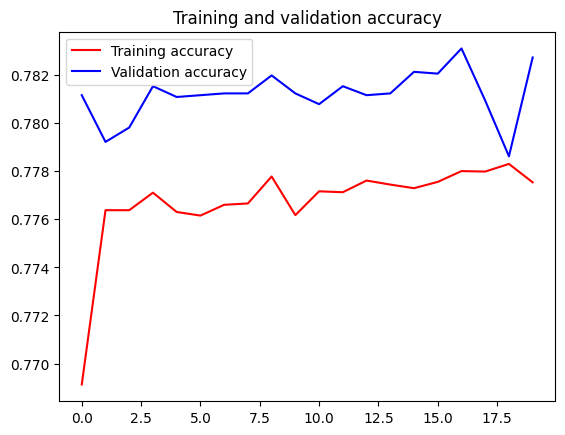

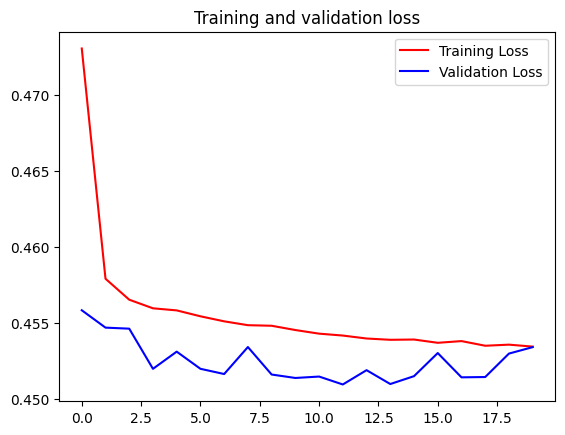

In [52]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 49ms/step


array([[0.89207107, 0.10792892]], dtype=float32)

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 394 (1.54 KB)
Trainable params: 394 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
saved_model = "mdl_std/model_with_std.h5"
model.save(saved_model)

/home/abayup14/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
!tensorflowjs_converter --input_format=keras {saved_model} ./mdl_std

2023-11-10 12:18:27.466316: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 12:18:27.466402: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 12:18:27.466447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Cari model TF.JS di folder mdl_std